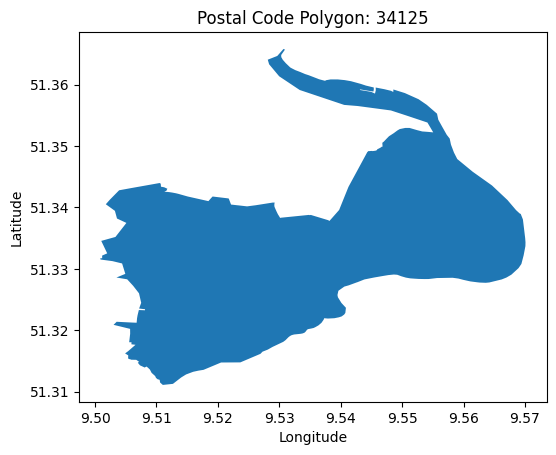

Selected Polygon Information:
POLYGON ((9.5030204 51.3208864, 9.5035317 51.3213884, 9.5036858 51.3213748, 9.5061244 51.3212532, 9.5067764 51.3212272, 9.5068489 51.3219768, 9.5069288 51.3224397, 9.5071376 51.3232953, 9.508132 51.3232554, 9.508155 51.3234255, 9.50718 51.3235387, 9.5074569 51.3242944, 9.5075204 51.3244677, 9.507164 51.3260165, 9.506213 51.3272356, 9.5052381 51.328298, 9.5034906 51.3285893, 9.5049347 51.3291833, 9.5044118 51.3308771, 9.5028454 51.3312577, 9.5009 51.3315168, 9.5008403 51.3317047, 9.501168 51.3317375, 9.5011604 51.3321581, 9.501986 51.3325233, 9.5010176 51.3345522, 9.5033253 51.335193, 9.5051133 51.3374791, 9.5035791 51.3381939, 9.5032411 51.3394447, 9.5017589 51.3405168, 9.5023006 51.3411272, 9.5024195 51.3412611, 9.5039247 51.3427912, 9.5057419 51.3431221, 9.5057493 51.3431235, 9.5058432 51.3431406, 9.5058443 51.3431408, 9.5077711 51.3434837, 9.50834 51.3435849, 9.5087963 51.3436661, 9.5105332 51.3439751, 9.5107 51.3438593, 9.5107401 51.3433729, 9.5112556 

In [1]:
import json
from shapely.geometry import shape, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from pymongo import MongoClient

def connect_to_mongodb(database_name, collection_name):
    """
    Connects to MongoDB and returns the MongoDB client and collection.
    """
    client = MongoClient('localhost', 27017)
    db = client[database_name]
    collection = db[collection_name]
    return client, collection

def retrieve_data_from_mongodb(collection):
    """
    Retrieves GeoJSON data from MongoDB collection.
    """
    cursor = collection.find()
    geojson_data = {"type": "FeatureCollection", "features": []}

    for document in cursor:
        geojson_data["features"].append(document)

    return geojson_data

def coordinates_to_polygon(coordinates):
    """
    Converts coordinates to a Shapely Polygon.
    """
    return Polygon(coordinates)

def plot_polygon(postal_code_polygons, postal_code):
    """
    Plots the polygon for a given postal code and returns the polygon.
    """
    polygon = postal_code_polygons.get(postal_code)
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title(f"Postal Code Polygon: {postal_code}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
        return polygon
    else:
        print(f"No polygon found for postal code: {postal_code}")
        return None

# Example usage
if __name__ == "__main__":
    # MongoDB configuration
    database_name = "ZIP_Poly_Ger_Test"
    collection_name = "ZIP_Poly_Ger_Collection_Test"

    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(database_name, collection_name)

    # Retrieve GeoJSON data from MongoDB
    geojson_data_from_mongo = retrieve_data_from_mongodb(mongo_collection)

    # Load GeoJSON data from MongoDB for comparison
    postal_code_polygons_mongo = {document.get('postal_code'): coordinates_to_polygon(document.get('geometry')['coordinates'][0]) for document in geojson_data_from_mongo['features']}

    # Input the postal code you want to plot
    input_postal_code = input("Enter a postal code: ")

    # Plot the polygon for the specified postal code and get the polygon
    selected_polygon = plot_polygon(postal_code_polygons_mongo, input_postal_code)

    # Output the polygon information
    if selected_polygon:
        print("Selected Polygon Information:")
        print(selected_polygon)

    # Close MongoDB connection when done
    mongo_client.close()
